In [333]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values
x, y = data[:,0],data[:,1]
dataset

,x,y
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


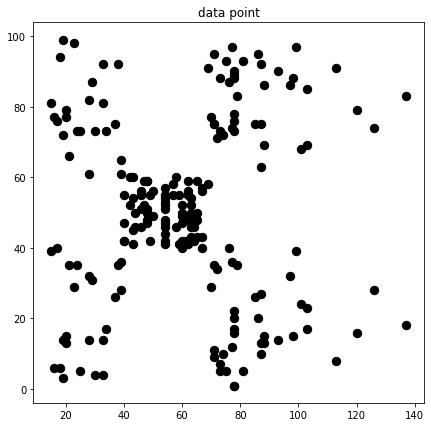

In [334]:
plt.figure(figsize=(7,7))
plt.title('data point')
plt.scatter(x,y, c='black', s=70)

In [335]:
def compute_distance(a, b):

    dist = np.power(np.sum(np.power(a - b,2),axis=1),0.5)

    return dist


In [336]:
def compute_centroid(Z, cluster_num):
    centroids = []
    for cluster in range(cluster_num) :
        centroids.append(np.mean(Z[Z[:,2]==cluster][:,:2], axis=0))
    return np.array(centroids)


In [337]:
def compute_label(z, M):
    dists = []
    for m in M :
        dists.append(compute_distance(z,m))
    dists = np.array(dists)
    dists = np.reshape(dists,[len(M),len(z)],order='F').T
    label = np.argmin(dists, axis=1)
    return label


In [338]:
def compute_loss(clusters, centroids) :
    loss = 0
    for i in range(len(centroids)) :
        cluster = clusters[clusters[:,2]==i][:,:2]
        loss += np.sum(compute_distance(cluster, centroids[i]))
    loss /= len(clusters)
    return loss

In [339]:
# init clusters
n = len(data)
clusters = np.append(data,np.ones(n)[:,None], axis=1)
cluster_num = 5
for idx in range(n) :
    rand_num = np.random.randint(cluster_num)
    clusters[idx][2] = rand_num
centroids = compute_centroid(clusters, cluster_num)
centroids

array([[63.84210526, 50.55263158],
       [57.62790698, 51.6744186 ],
       [58.02564103, 55.23076923],
       [59.69444444, 43.63888889],
       [63.54545455, 49.36363636]])

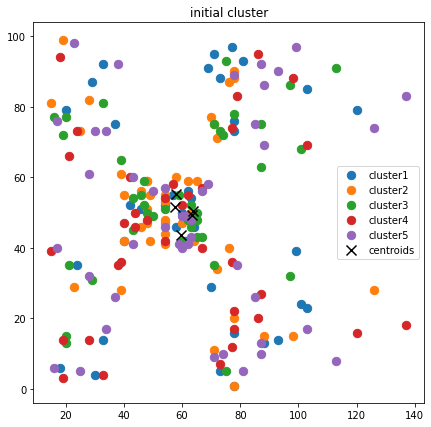

In [340]:
plt.figure(figsize=(7,7))
plt.title('initial cluster')
legends = ['cluster{}'.format(idx+1) for idx in range(cluster_num)]
legends.append('centroids')
for idx in range(cluster_num) :
    cluster = clusters[clusters[:,2]==idx]
    plt.scatter(cluster[:,0],cluster[:,1], s=70)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black', s=100)
plt.legend(legends)

In [341]:
n = 1000
L_iters = [-1 for _ in range(n)]
for idx in range(n) :
    clusters[:,2] = compute_label(clusters[:,:2], centroids)
    centroids = compute_centroid(clusters, cluster_num)
    L_iters[idx] = compute_loss(clusters, centroids)